<a href="https://colab.research.google.com/github/janet12041/RPAA/blob/main/RPAA_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 7: Clustering

##Janet Illescas Coria

1. Usando K-means y el archivo wine.csv realiza los siguientes ejercicios:

- Para k = 1, ..., 10. Calcula el WCSS para cada k y graficalos.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargamos los datos
dataset = pd.read_csv('wine.csv')

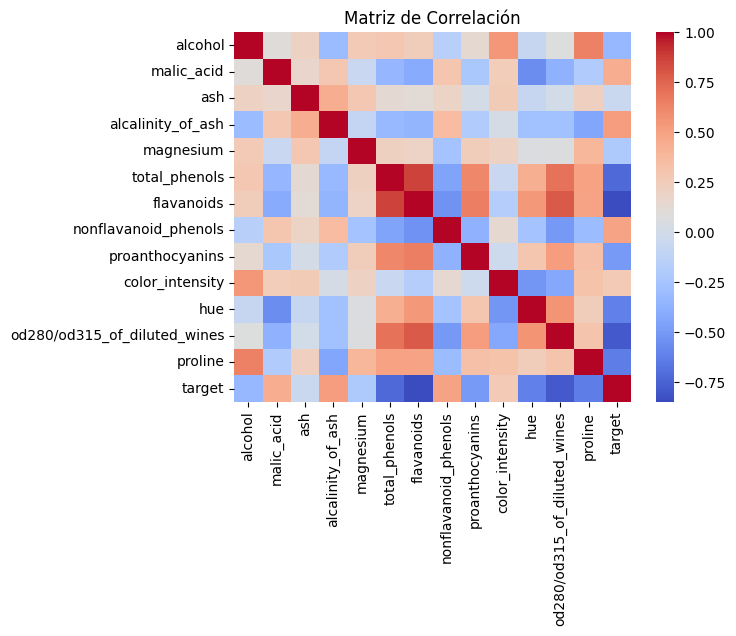

In [44]:
import seaborn as sns

# Calculamos la matriz de correlación
correlacion = dataset.corr()

sns.heatmap(correlacion, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Usamos la matriz para calcular la correlación entre las características y evitar que existan correlaciones altas entre sí, con el fin de reducir la redundancia de datos y mejorar la interpretación del clustering.



In [45]:
# Seleccionamos todas las características esxcepto la columna target
X = dataset.iloc[:, [3,4,5,8,9,10]].values

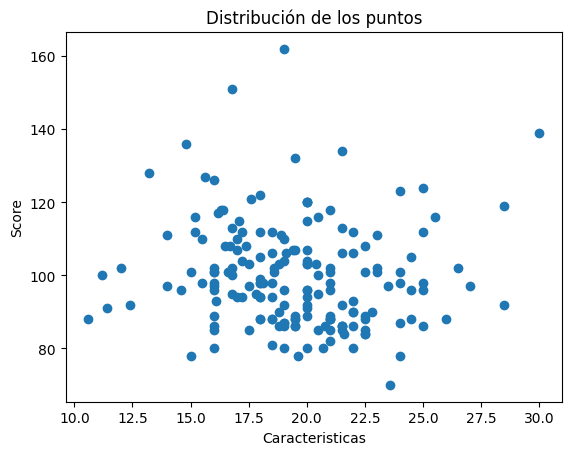

In [46]:
# Mostramos la dispersión de los puntos a los que se aplicará el clustering
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.title('Distribución de los puntos')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

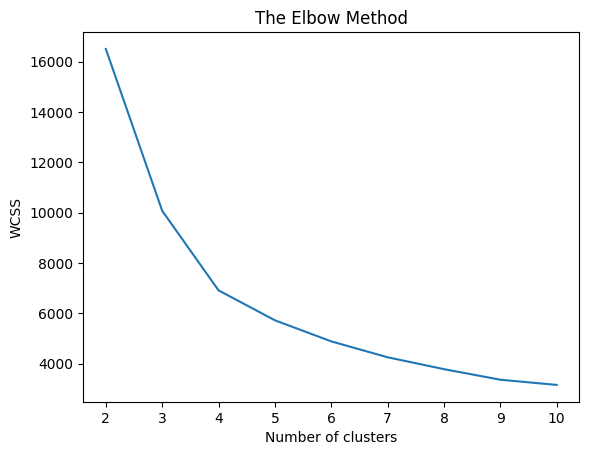

In [48]:
# Método del codo
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

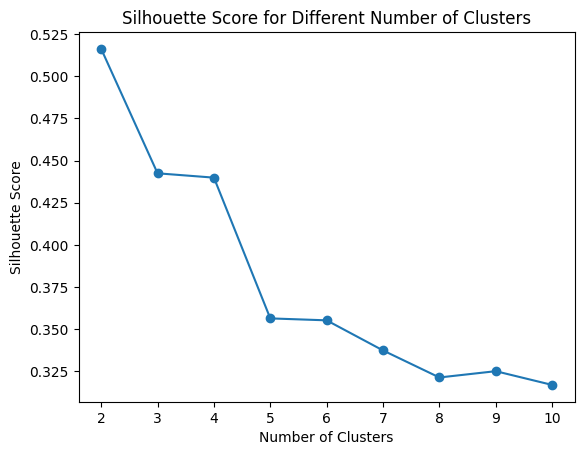

In [49]:
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Justifica qué valor de k sería el más óptimo

En base al método del codo y el método Silhouette Score, vemos que probablemente el valor óptimo para k es 3. Este número de clústers sugiere que dividir los datos en tres clústers inicialmente reduce significativamente la variabilidad dentro de cada clúster sin agregar demasiada complejidad.

En el primero se busca el punto donde la disminución de WCSS comienza a disminuir significativamente más lento, en este caso el 3, pues añadir más clusters puede no proprocionar mucha mejora.

Por otro lado, en el puntaje de la silueta evalúa la definición y separación de los clústers, vemos que aunque k=2 es el puntaje más alto, pero k=3 también mantiene un puntaje relativamente alto y al mismo tiempo logra una mayor granularidad en la agrupación de los datos.

- Obtén las diferentes clases de vinos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


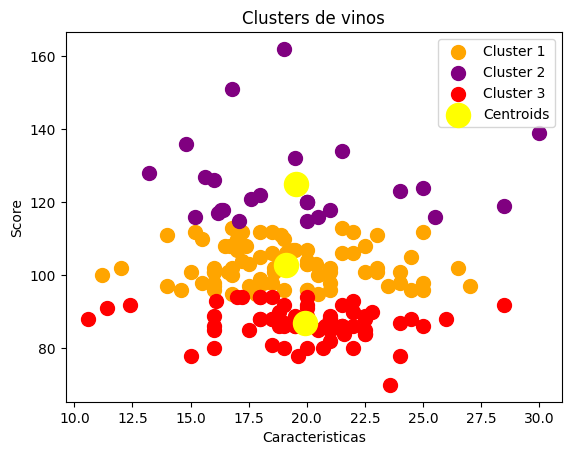

In [50]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de vinos')
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.legend()
plt.show()

2. Usando el archivo clusters.csv realiza lo siguiente

In [51]:
# Cargamos los datos
dataset = pd.read_csv('clusters.csv')

X = dataset.iloc[:, [0, 1]].values

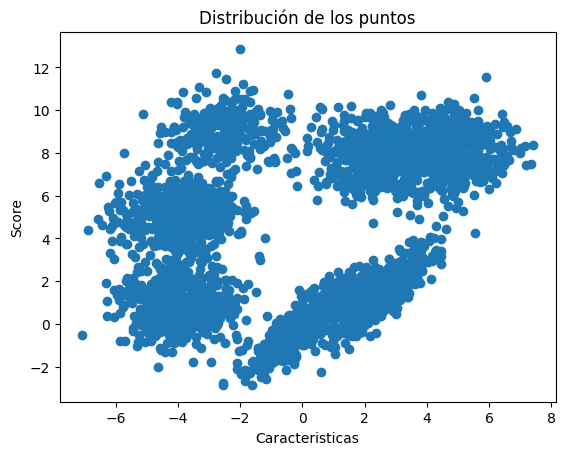

In [52]:
# Antes visualizaremos la dispersión de los puntos
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.title('Distribución de los puntos')
plt.show()

- Utiliza Hierarchical clustering, K-Means, DBSCAN y
GaussianMixture para obtener los diferentes
clusters.

- Prueba diferentes hiperparámetros en cada uno de los modelos y reporta aquellos que produzcan los
mejores resutados.

- Utiliza al menos tres formas de evaluar los resultados de los algoritmos utilizados.

Hierarcical

In [53]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

silhouette_scores = []
davies_bouldin_scores = []

for i in range(2, 15):
    agg_clustering = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = 'ward')
    agg_clustering.fit(X)
    silhouette_avg = silhouette_score(X, agg_clustering.labels_)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_avg = davies_bouldin_score(X, agg_clustering.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

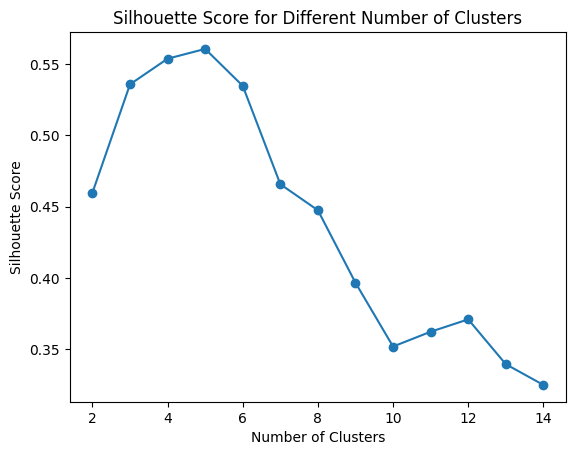

In [54]:
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

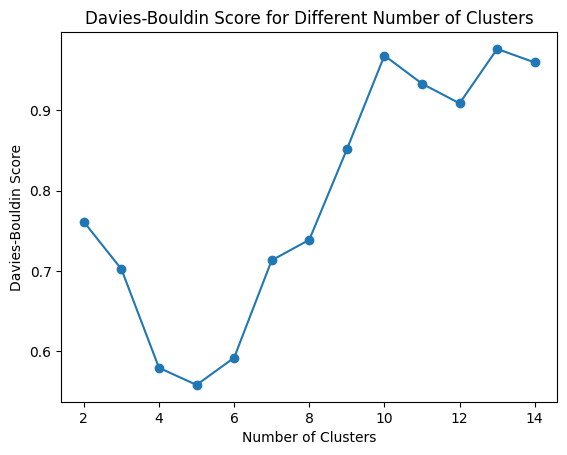

In [55]:
plt.plot(range(2, 15), davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

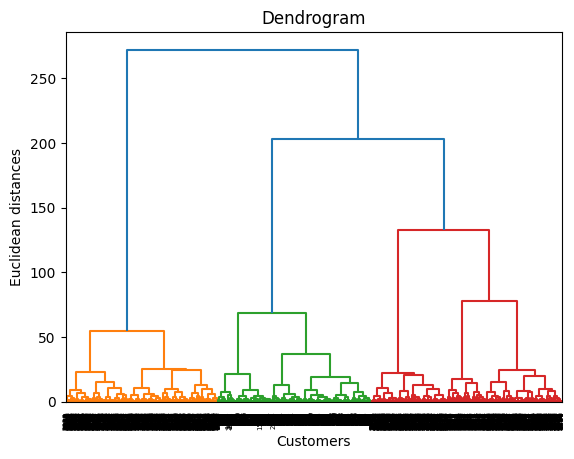

In [56]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


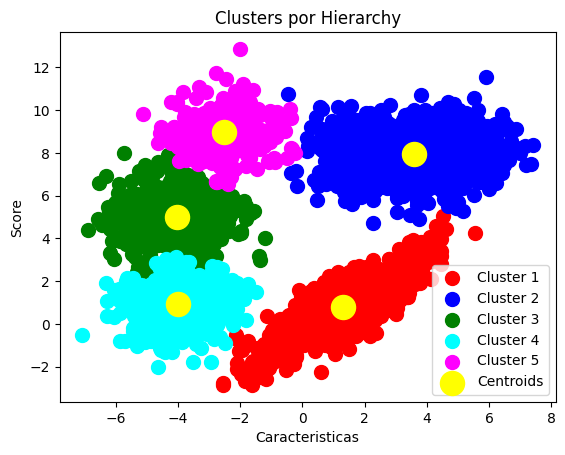

In [57]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

centroids = []
for i in range(6):
    centroids.append(np.mean(X[y_hc == i], axis=0))

# Visualizar los clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters por Hierarchy')
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


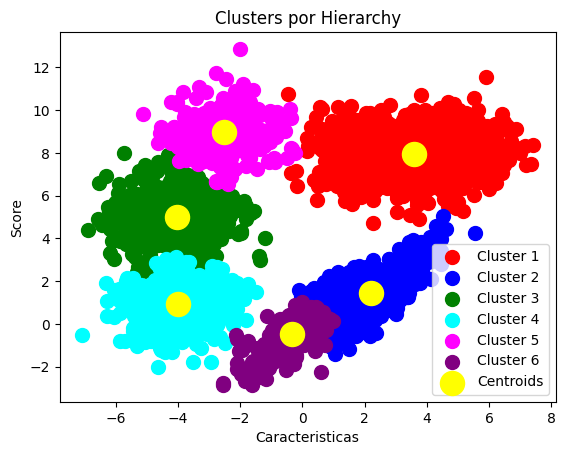

In [58]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

centroids = []
for i in range(6):
    centroids.append(np.mean(X[y_hc == i], axis=0))

# Visualizar los clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters por Hierarchy')
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.legend()
plt.show()

De acuerdo a las primeras 2 métricas el óptimo número de clústers son 5 y por el dendograma son 6. Así que probamos con ambos casos y desde mi punto de vista con 5 clústers es suficiente.

K-Means

In [59]:
from sklearn.metrics import davies_bouldin_score

wcss = []
silhouette_scores = []
davies_bouldin_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_avg = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

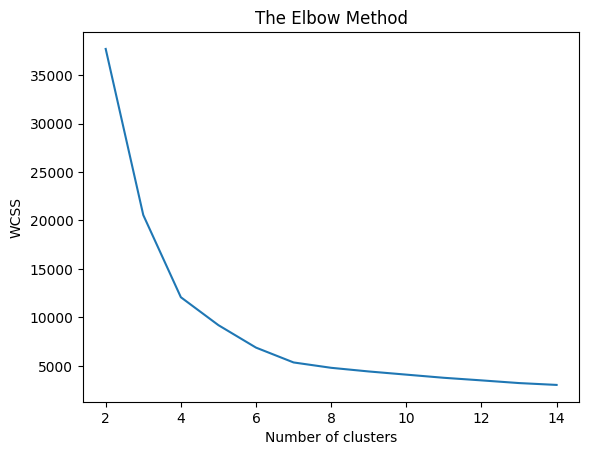

In [60]:
# Método del codo
plt.plot(range(2, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

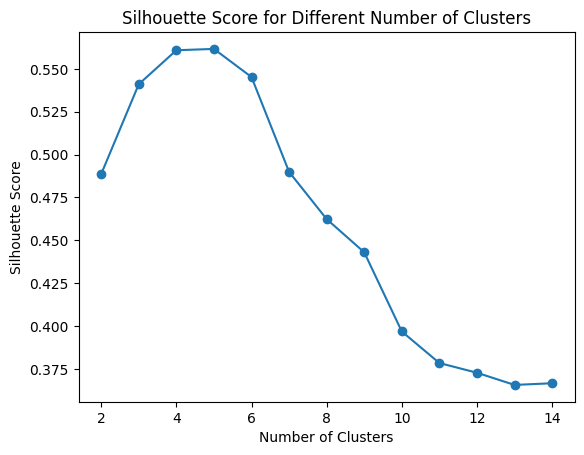

In [61]:
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

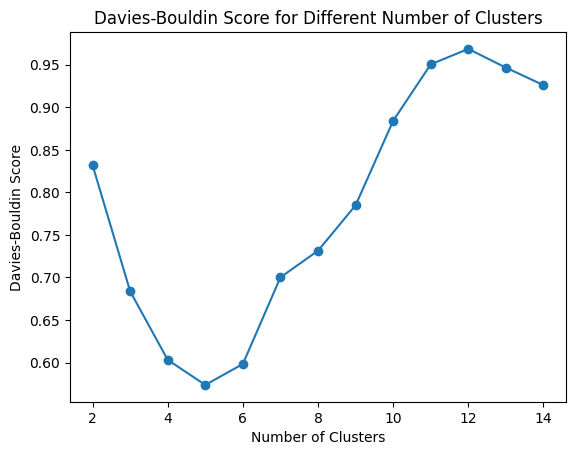

In [62]:
plt.plot(range(2, 15), davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


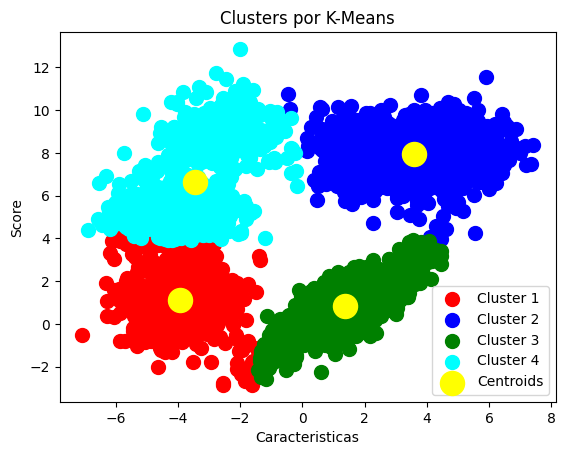

In [63]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters por K-Means')
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


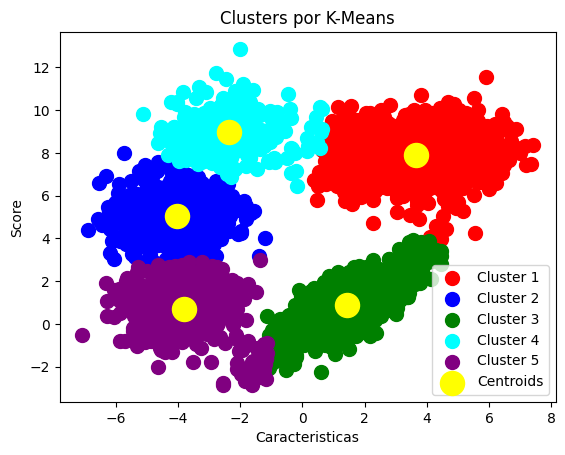

In [64]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters por K-Means')
plt.xlabel('Caracteristicas')
plt.ylabel('Score')
plt.legend()
plt.show()

Por las primeras dos métricas pareciera que 4 clústers son los indicados, pero la última sugiere que sean 5. Intentamos ambos casos, y me parece más acertado que sean 5, pues a simple vista si existe una agrupacion que es más diferenciable y que en el caso de los 4 clústers solo se ignoraria.

DBSCAN

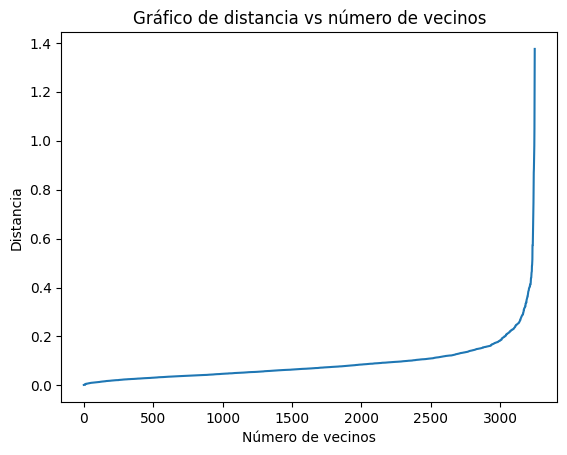

In [65]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia')
plt.title('Gráfico de distancia vs número de vecinos')
plt.show()

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score

# Probando diferentes parámetros
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 4, 5, 6, 7]

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels_pred = dbscan.labels_

        silhouette = silhouette_score(X, labels_pred)
        calinski_h_score = calinski_harabasz_score(X, labels_pred)
        davies_b_score = davies_bouldin_score(X, labels_pred)

        silhouette_scores.append(silhouette)
        calinski_harabasz_scores.append(calinski_h_score)
        davies_bouldin_scores.append(davies_b_score)

silhouette_scores = np.array(silhouette_scores).reshape(len(epsilon_values), len(min_samples_values))
calinski_harabasz_scores = np.array(calinski_harabasz_scores).reshape(len(epsilon_values), len(min_samples_values))
davies_bouldin_scores = np.array(davies_bouldin_scores).reshape(len(epsilon_values), len(min_samples_values))

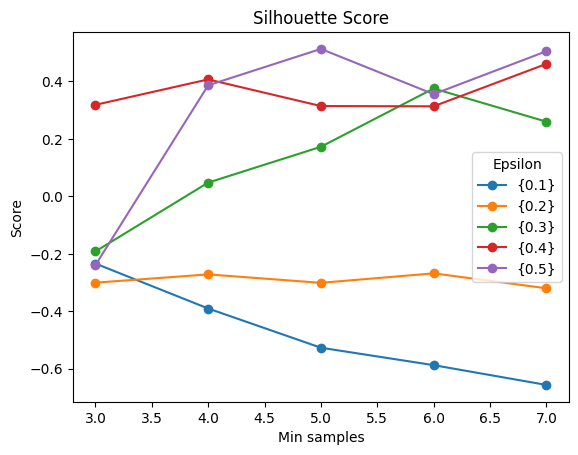

In [67]:
for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, silhouette_scores[i], label={eps}, marker='o')

plt.xlabel('Min samples')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.legend(title='Epsilon')
plt.show()

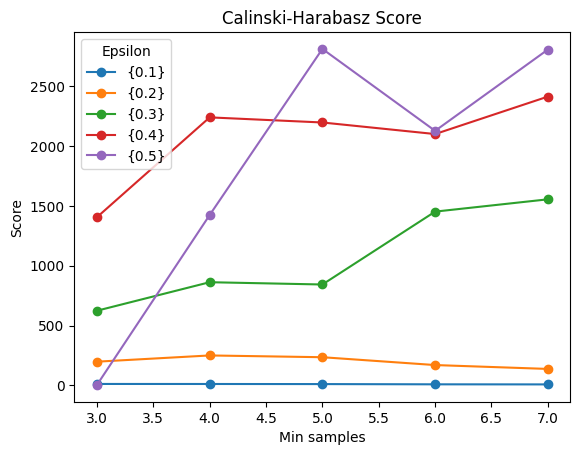

In [68]:
for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, calinski_harabasz_scores[i], label={eps}, marker='o')

plt.xlabel('Min samples')
plt.ylabel('Score')
plt.title('Calinski-Harabasz Score')
plt.legend(title='Epsilon')
plt.show()

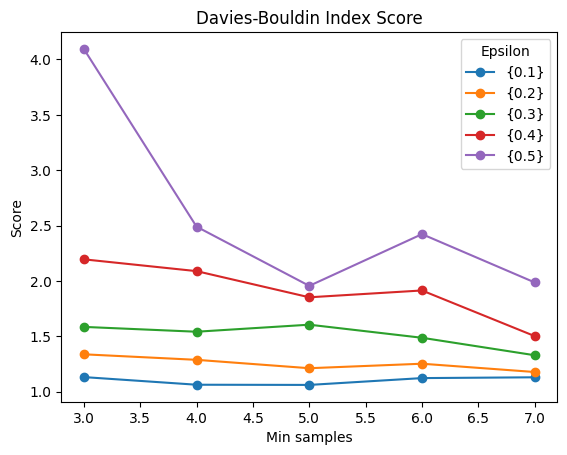

In [69]:
for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, davies_bouldin_scores[i], label={eps}, marker='o')

plt.xlabel('Min samples')
plt.ylabel('Score')
plt.title('Davies-Bouldin Index Score')
plt.legend(title='Epsilon')
plt.show()

Notemos que en todas las métricas anteriores, el mejor número de clústers es 5 (en los 2 primeros es el correspondiente al valor más y para el último el menor valor). Los dos primeros con una epsilon de 0.5

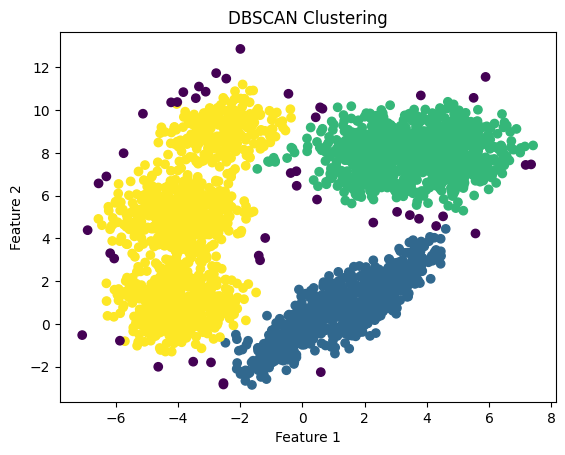

In [70]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

Gaussian Mixture

In [72]:
from matplotlib.colors import LogNorm

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [75]:
from sklearn.mixture import GaussianMixture

silhouette_scores = []
bics_scores = []
aics_scores = []

for i in range(2, 11):
    gaussian_mix = GaussianMixture(n_components=i, n_init=10
                         , random_state=42)
    gaussian_mix.fit(X)
    labels = gaussian_mix.predict(X)

    silhouette = silhouette_score(X, labels)

    silhouette_scores.append(silhouette)
    bics_scores.append(gaussian_mix.bic(X))
    aics_scores.append(gaussian_mix.aic(X))


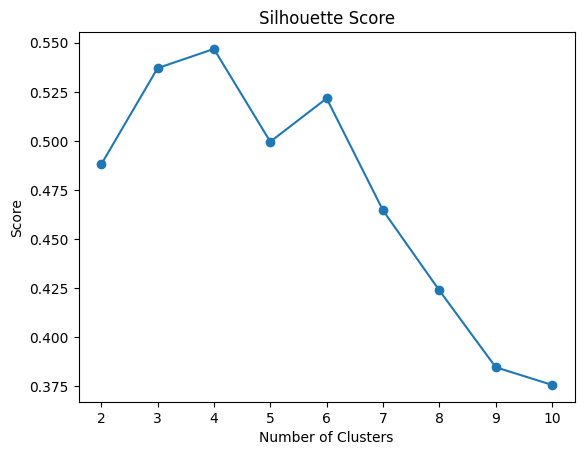

In [78]:
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

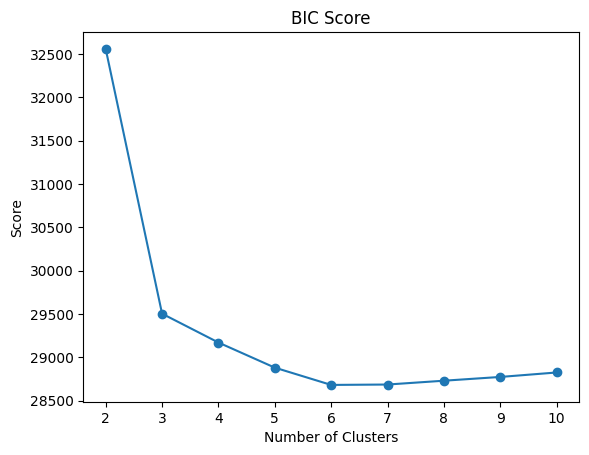

In [79]:
plt.plot(range(2, 11), bics_scores, marker='o', linestyle='-')
plt.title('BIC Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

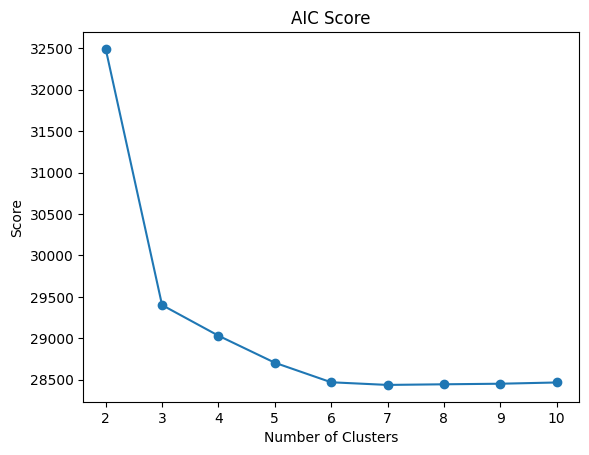

In [82]:
plt.plot(range(2, 11), aics_scores, marker='o', linestyle='-')
plt.title('AIC Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

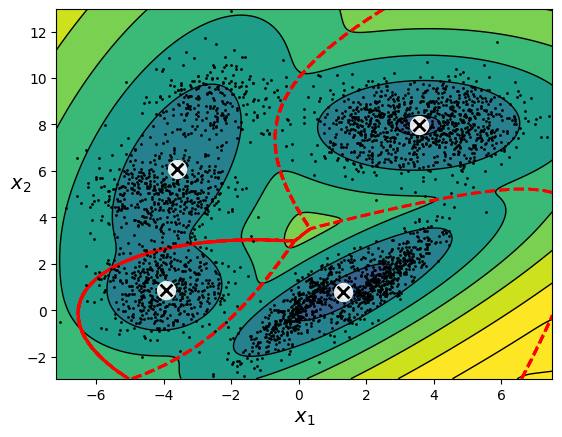

In [85]:
gaussian_mixture = GaussianMixture(n_components=4, n_init=10, random_state=42)
gaussian_mixture.fit(X)
plot_gaussian_mixture(gaussian_mixture, X)
plt.show()

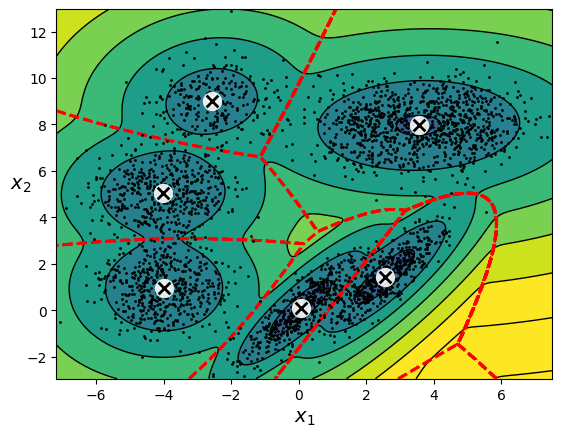

In [84]:
gaussian_mixture = GaussianMixture(n_components=6, n_init=10, random_state=42)
gaussian_mixture.fit(X)
plot_gaussian_mixture(gaussian_mixture, X)
plt.show()

Con Silhouette podemos identificar que el número de clústers óptimo es 4, aunque también 6 parece ser buena opción, la cual es la indicada por las siguientes 2 métricas. Probamos aún así con ambos valores y a simple vista parece ser mejor el resultado usando 6.

- ¿Cuál es el número óptimo de clusters para este conjunto de datos? Justifica tu respuesta.

En todos los métodos que se probaron obtuvimos un número óptimo de clústers que variaba de 4 a 6, siendo probablemente 5 el más común y fácil a la vista de identificar.

- Compara los resultados entre los diferentes algoritmos. ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?

El clustering jerarquico me parece tiene un buen resultado pero resulta más costoso y no sabemos con certeza si dentro de los datos existe una estructura jerárquica.

Por otro lado, K-Means es el más sencillo y que resulta también bastante bien debidoa que los datos están de tal forma que podemos visualmente identificar o aproximar el número de clústers necesarios, tienen una distribución algo clara y formas medio esféricas. Solo aquellas que se separan más de esta forma y que en zonas se intersecten con otras vemos que no es tan preciso.

Sabemos que DBSCAN es bueno con datos que tienen ruido y formas más variantes, pero en este caso notamos que existe poco ruido y nuestros datos cuentan con una buena distribución por lo que no resulta muy efectivo.

Por último, Gaussian Mixture me parece también realiza un buen trabajo aunque no estamos seguros tampoco de si los datos tienen una distribucion gaussiana.

Tanto el método jerarquico como gaussian mixture parecen tener mejores resultados e incluso sugieren un cluster que ya no soy capaz de identificar a simple vista.